In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access folder in Google Drive
folder_path = '/content/drive/MyDrive/AI Project'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

### Importing dataset




In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI Project/datasets/comments.csv')

In [ ]:
dataset.shape


(18409, 5)

In [ ]:
dataset=dataset.head(9000)
dataset.shape

(9000, 5)

In [ ]:
dataset.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [ ]:
# Define the names of the columns you want to drop
column_names = ['Unnamed: 0', 'Video ID', 'Likes']  # Names of the columns to drop

# Drop the specified columns
dataset = dataset.drop(column_names, axis=1)

In [ ]:
dataset.head()

,Comment,Sentiment
0,Let's not forget that Apple Pay in 2014 requir...,1.0
1,Here in NZ 50% of retailers don’t even have co...,0.0
2,I will forever acknowledge this channel with t...,2.0
3,Whenever I go to a place that doesn’t take App...,0.0
4,"Apple Pay is so convenient, secure, and easy t...",2.0


### Data Preprocessing

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

corpus = []
ps = PorterStemmer()
all_stopwords = set(stopwords.words('english'))

for i in range(0, 9000):
    text = dataset['Comment'][i]
    if isinstance(text, str):
        comment = re.sub('[^a-zA-Z]', ' ', text)
        comment = comment.lower()
        comment = comment.split()
        comment = [ps.stem(word) for word in comment if not word in all_stopwords]
        comment = ' '.join(comment)
        corpus.append(comment)
    else:
        print(f"Invalid data at index {i} in 'clean_text': {text}")


In [ ]:
corpus

### Data transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

if len(X) == len(y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
else:
    # Adjust the data to have the same number of samples
    X = X[:999]  # Remove the extra sample from X
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


### Model fitting (Naive Bayes)

[[240  17  23]
 [300  96  46]
 [763  44 271]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.18      0.86      0.30       280
         1.0       0.61      0.22      0.32       442
         2.0       0.80      0.25      0.38      1078

    accuracy                           0.34      1800
   macro avg       0.53      0.44      0.34      1800
weighted avg       0.66      0.34      0.35      1800

Sensitivy:  0.24242424242424243
Specificity:  0.933852140077821


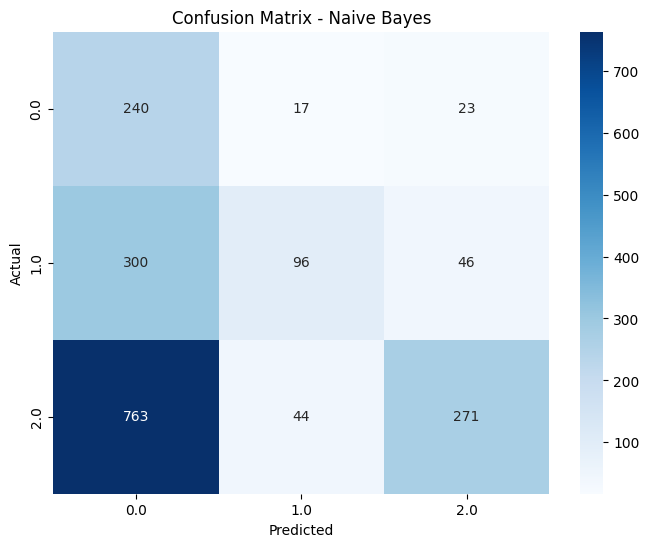

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


# Classification report (Naive Bayes)
classification_rep_nb = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_rep_nb)

print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

# Get the predicted labels
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (SVM)

SVM Confusion Matrix:
[[128 103  49]
 [ 58 275 109]
 [ 51 128 899]]
SVM Accuracy: 0.7233333333333334
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.46      0.50       280
         1.0       0.54      0.62      0.58       442
         2.0       0.85      0.83      0.84      1078

    accuracy                           0.72      1800
   macro avg       0.64      0.64      0.64      1800
weighted avg       0.73      0.72      0.72      1800

Sensitivy:  0.8258258258258259
Specificity:  0.5541125541125541


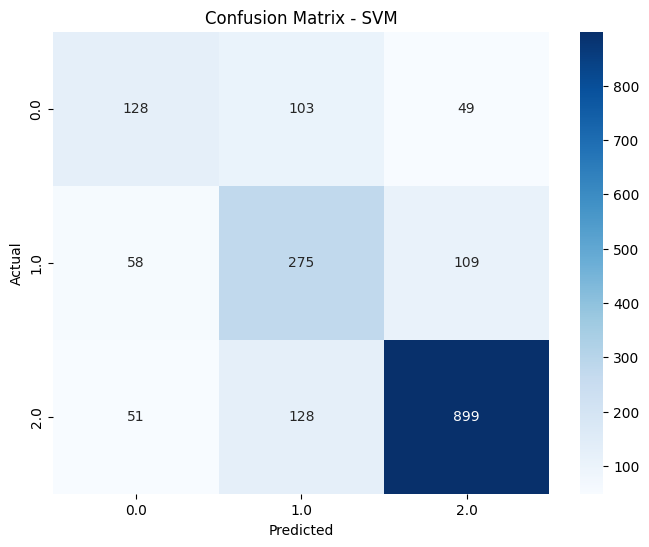

In [ ]:
### Model fitting (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report



classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

# Exporting SVM Classifier to later use in prediction
joblib.dump(classifier_svm, 'c3_SVM_Sentiment_Model')

### Model performance (SVM)
y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report (SVM)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_rep_svm)

print('Sensitivy: ',cm_svm[1][1]/(cm_svm[1][1]+cm_svm[1][0]))
print('Specificity: ',cm_svm[0][0]/(cm_svm[0][0]+cm_svm[0][1]))


# Get the predicted labels
y_pred_svm = classifier_svm.predict(X_test)

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_svm)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


### Model fitting (Random Forest)

Random Forest Confusion Matrix:
[[ 81  64 135]
 [ 32 219 191]
 [ 11  83 984]]
Random Forest Accuracy: 0.7133333333333334
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.29      0.40       280
         1.0       0.60      0.50      0.54       442
         2.0       0.75      0.91      0.82      1078

    accuracy                           0.71      1800
   macro avg       0.67      0.57      0.59      1800
weighted avg       0.70      0.71      0.69      1800

Sensitivy:  0.8725099601593626
Specificity:  0.5586206896551724


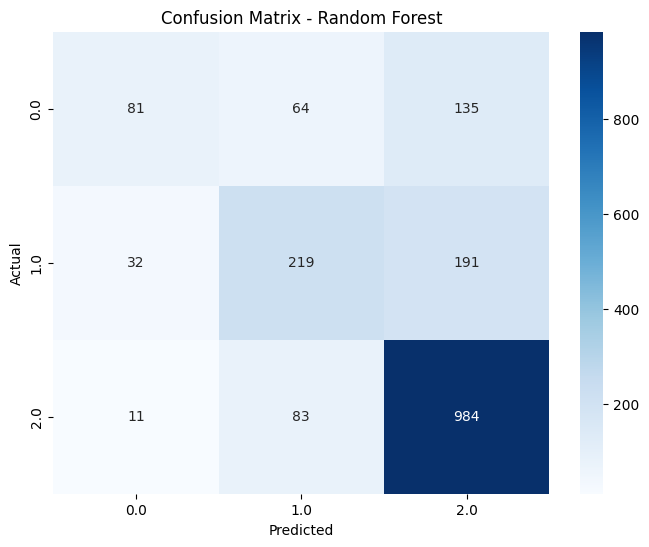

In [ ]:
### Model fitting (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rf.fit(X_train, y_train)

# Exporting Random Forest Classifier to later use in prediction
joblib.dump(classifier_rf, 'c3_RF_Sentiment_Model')

### Model performance (Random Forest)
y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report (Random Forest)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)

print('Sensitivy: ',cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0]))
print('Specificity: ',cm_rf[0][0]/(cm_rf[0][0]+cm_rf[0][1]))


# Get the predicted labels
y_pred_rf = classifier_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_rf)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (Gradient Boosting)

Gradient Boosting Confusion Matrix:
[[  50   33  197]
 [  10   97  335]
 [   7   32 1039]]
Gradient Boosting Accuracy: 0.6588888888888889
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.18      0.29       280
         1.0       0.60      0.22      0.32       442
         2.0       0.66      0.96      0.78      1078

    accuracy                           0.66      1800
   macro avg       0.67      0.45      0.46      1800
weighted avg       0.66      0.66      0.59      1800

Sensitivy:  0.9065420560747663
Specificity:  0.6024096385542169


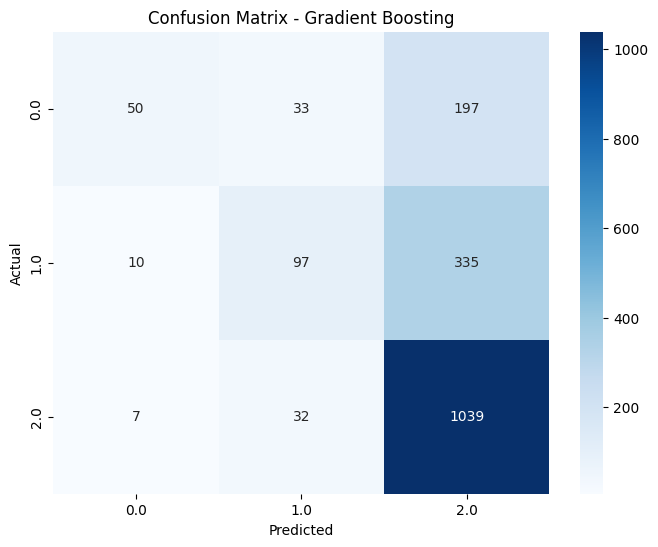

In [ ]:
### Model fitting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_gb.fit(X_train, y_train)

# Exporting Gradient Boosting Classifier to later use in prediction
joblib.dump(classifier_gb, 'c4_GB_Sentiment_Model')

### Model performance (Gradient Boosting)
y_pred_gb = classifier_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification report (Gradient Boosting)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)

print('Sensitivy: ',cm_gb[1][1]/(cm_gb[1][1]+cm_gb[1][0]))
print('Specificity: ',cm_gb[0][0]/(cm_gb[0][0]+cm_gb[0][1]))



# Get the predicted labels
y_pred_gb = classifier_gb.predict(X_test)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_gb)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (Logistic Regression)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix:
[[108 109  63]
 [ 47 261 134]
 [ 29 120 929]]
Logistic Regression Accuracy: 0.7211111111111111
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.39      0.47       280
         1.0       0.53      0.59      0.56       442
         2.0       0.83      0.86      0.84      1078

    accuracy                           0.72      1800
   macro avg       0.65      0.61      0.62      1800
weighted avg       0.72      0.72      0.71      1800

Sensitivy:  0.8474025974025974
Specificity:  0.4976958525345622


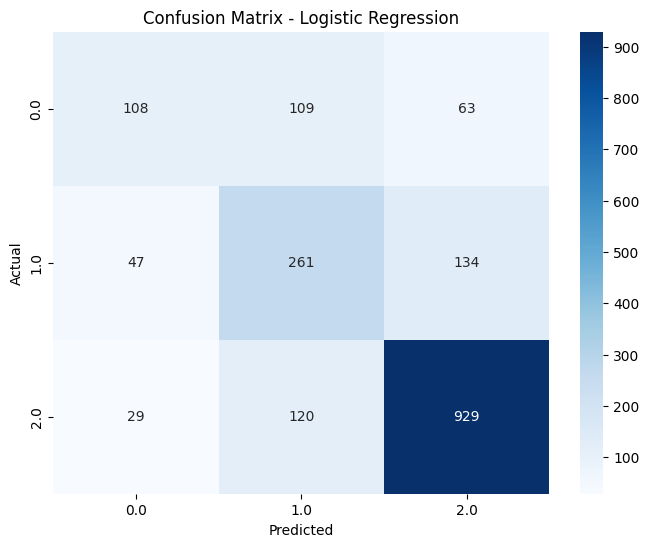

In [ ]:
### Model fitting (Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

# Exporting Logistic Regression Classifier to later use in prediction
joblib.dump(classifier_lr, 'c5_LR_Sentiment_Model')

### Model performance (Logistic Regression)
y_pred_lr = classifier_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Classification report (Logistic Regression)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_rep_lr)

print('Sensitivy: ',cm_lr[1][1]/(cm_lr[1][1]+cm_lr[1][0]))
print('Specificity: ',cm_lr[0][0]/(cm_lr[0][0]+cm_lr[0][1]))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the predicted labels
y_pred_lr = classifier_lr.predict(X_test)

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

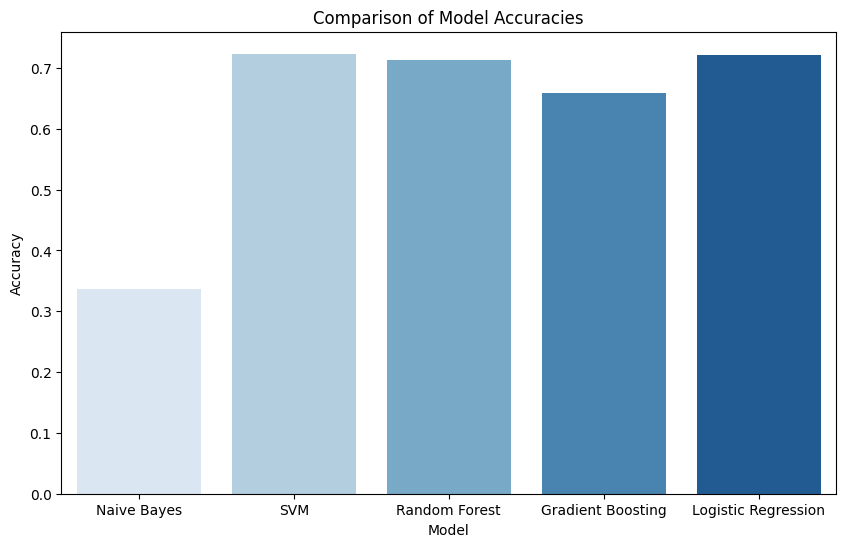

In [ ]:
# Create a list of model names and their corresponding accuracies
model_names = ['Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_svm, accuracy_rf, accuracy_gb, accuracy_lr]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()
